# Подключаем библиотеки

In [20]:
from MainWorkers import FUNCOFMETHODS, pipe, get_gen_sample, times_when_method_better, RunCheck
import numpy as np
import scipy.stats as sts
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from SomeFunc import comparison_of_two
import pickle

In [21]:
with open("./TestSamples/Samples/M 2023-04-09 16:08:50", "rb") as fp:
    Samples = pickle.load(fp)

In [22]:
ResultsForMax, ResultsForSum, Samples, Ultradists = RunCheck(Samples, FUNCOFMETHODS)

# Подсчет результатов

In [23]:
ResultsForMax.head()

,single_linked,complete_linked,group_average_linked,weighted_average_linked,min_max_linked,median_linked
0,143.078367,155.768467,82.685215,86.032713,77.884233,78.620052
1,94.747695,66.820415,40.845728,54.321220,33.410208,42.237736
2,61.184774,61.184774,34.171907,35.084156,30.592387,40.417503
3,75.818337,88.833671,80.984940,80.332748,36.975442,63.493385
4,93.239285,93.239285,47.198639,49.861453,46.619643,49.742050


In [24]:
ResultsForSum.head()

,single_linked,complete_linked,group_average_linked,weighted_average_linked,min_max_linked,median_linked
0,84.566320,114.021431,65.092694,65.092694,65.092694,65.092694
1,80.260717,40.094506,34.201206,39.591403,31.226998,28.981009
2,46.087889,37.497041,30.909724,34.138240,32.341532,28.689978
3,36.660914,41.925737,36.681287,36.660914,38.018872,28.434829
4,58.357064,56.967472,46.524953,46.524953,46.524953,46.524953


# Матрица сравнения результатов

<AxesSubplot: >

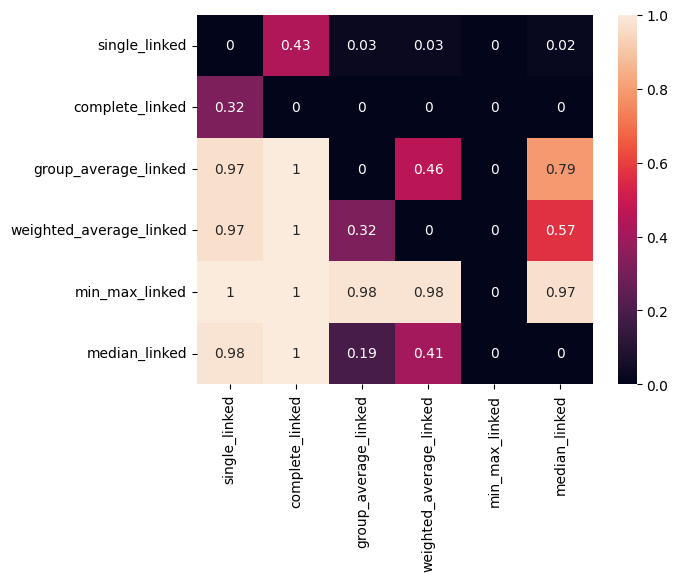

In [25]:
sns.heatmap(times_when_method_better(ResultsForMax), annot=True)

<AxesSubplot: >

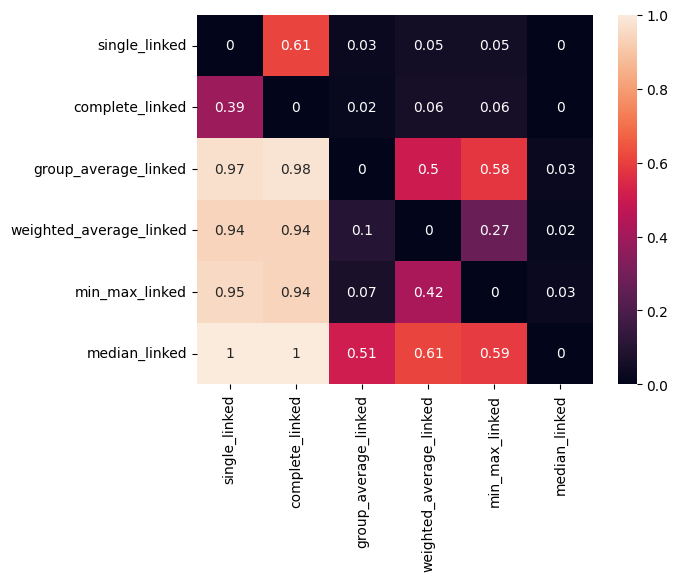

In [26]:
sns.heatmap(times_when_method_better(ResultsForSum), annot=True)

In [27]:
ResultsForSum.query("median_linked <= min_max_linked").shape[0] 

97

Проверку делать на < или на <=???

# Проверка на монотонность

In [28]:
for name_of_method in Ultradists.keys():
    print(name_of_method.upper())
    flag = 0
    for num, ultra in enumerate(Ultradists[name_of_method]):
        if sorted(ultra) != ultra:
            print(f"Пример номер {num}")
            print(ultra)
            print()
            print()
            flag = 1
    if flag != 1:
        print("the method is monotonous")
        print()

SINGLE_LINKED
the method is monotonous

COMPLETE_LINKED
the method is monotonous

GROUP_AVERAGE_LINKED
the method is monotonous

WEIGHTED_AVERAGE_LINKED
the method is monotonous

MIN_MAX_LINKED
Пример номер 27
[23.104112188093136, 50.3194793295796, 48.43298868265925, 99.07825933985333]


MEDIAN_LINKED
Пример номер 27
[23.104112188093136, 50.3194793295796, 48.43298868265925, 86.21389956150855]




### Анализ (Отлов примеров, когда МинМакс дает результаты хуже других методов)

In [29]:
comparison_of_two(ResultsForMax, Samples, 'min_max_linked', 'single_linked', 'max')

Метрика 'Максимального отклонения'
Сэмплы, когда min_max_linked дает результаты хуже, чем single_linked
Случаев не обнаружено


In [30]:
comparison_of_two(ResultsForMax, Samples, 'min_max_linked', 'complete_linked', 'max')

Метрика 'Максимального отклонения'
Сэмплы, когда min_max_linked дает результаты хуже, чем complete_linked
Случаев не обнаружено


In [31]:
comparison_of_two(ResultsForMax, Samples, 'min_max_linked', 'weighted_average_linked', 'max')

Метрика 'Максимального отклонения'
Сэмплы, когда min_max_linked дает результаты хуже, чем weighted_average_linked
Номер выборки 19
[[229.1 186.8]
 [ 96.   88.2]
 [226.8 203.7]
 [ 86.9 106.5]
 [ 80.6 124.6]]

Номер выборки 44
[[194.2 199.5]
 [100.8 114.2]
 [213.8 191.1]
 [120.9 101. ]
 [128.9  95.7]]



In [32]:
comparison_of_two(ResultsForMax, Samples, 'min_max_linked', 'group_average_linked', 'max')

Метрика 'Максимального отклонения'
Сэмплы, когда min_max_linked дает результаты хуже, чем group_average_linked
Номер выборки 19
[[229.1 186.8]
 [ 96.   88.2]
 [226.8 203.7]
 [ 86.9 106.5]
 [ 80.6 124.6]]

Номер выборки 44
[[194.2 199.5]
 [100.8 114.2]
 [213.8 191.1]
 [120.9 101. ]
 [128.9  95.7]]



In [33]:
comparison_of_two(ResultsForMax, Samples, 'min_max_linked', 'median_linked', 'max')

Метрика 'Максимального отклонения'
Сэмплы, когда min_max_linked дает результаты хуже, чем median_linked
Номер выборки 19
[[229.1 186.8]
 [ 96.   88.2]
 [226.8 203.7]
 [ 86.9 106.5]
 [ 80.6 124.6]]

Номер выборки 44
[[194.2 199.5]
 [100.8 114.2]
 [213.8 191.1]
 [120.9 101. ]
 [128.9  95.7]]

Номер выборки 67
[[178.  176.9]
 [133.3 146.4]
 [134.4 108.1]
 [173.5 175.8]
 [219.7 181.8]]



In [34]:
# test_data = np.round_(Samples[27] * 100)
test_data = Samples[27]
pd.DataFrame(test_data, columns=['x', 'y'])

,x,y
0,170.8,143.4
1,202.1,182.8
2,151.6,129.7
3,92.4,86.5
4,114.6,92.9


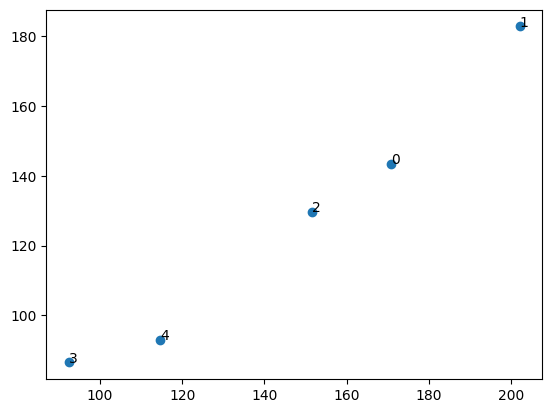

In [35]:
plt.scatter(test_data[:, 0], test_data[:, 1])

for i in range(len(test_data)):
    plt.text(test_data[i][0], test_data[i][1] + 0.03, str(i))

In [36]:
from MinMaxHierarchy import MinMaxHierarchy

clasters, init_dist, ultra_dists = MinMaxHierarchy(test_data, True)
print(ultra_dists)

Distance matrix: 0 step
           0           1          2           3           4
0   0.000000   50.319479  23.586649   96.871926   75.555873
1  50.319479    0.000000  73.279329  145.971847  125.452222
2  23.586649   73.279329   0.000000   73.286288   52.184672
3  96.871926  145.971847  73.286288    0.000000   23.104112
4  75.555873  125.452222  52.184672   23.104112    0.000000

Clusters:['0' '1' '2' '3' '4']


('Clusters:', array(['(4, 3)', '0', '1', '2'], dtype='<U25'))
Distance matrix: 1 step
            (4, 3)          0           1           2
(4, 3)    0.000000  86.213900  135.712034   62.735480
0        86.213900   0.000000   50.319479   96.871926
1       135.712034  50.319479    0.000000  145.971847
2        62.735480  96.871926  145.971847    0.000000



('Clusters:', array(['(0, 1)', '(4, 3)', '2'], dtype='<U25'))
Distance matrix: 2 step
            (0, 1)     (4, 3)          2
(0, 1)    0.000000  110.76386  48.432989
(4, 3)  110.763860    0.00000  62.735480
2        48.43

In [37]:
from HierarchyClusteringWithoutLogs import hierarchy
from Linkages import single_linked
from Linkages import weighted_average_linked

hierarchy(test_data, metric='euclidean', method=weighted_average_linked, logs_turn_on=True)

Distance matrix: 0 step
           0           1          2           3           4
0   0.000000   50.319479  23.586649   96.871926   75.555873
1  50.319479    0.000000  73.279329  145.971847  125.452222
2  23.586649   73.279329   0.000000   73.286288   52.184672
3  96.871926  145.971847  73.286288    0.000000   23.104112
4  75.555873  125.452222  52.184672   23.104112    0.000000

Clusters:['0' '1' '2' '3' '4']


('Clusters:', array(['(4, 3)', '0', '1', '2'], dtype='<U25'))
Distance matrix: 1 step
            0          1           2           3
0    0.000000  86.213900  135.712034   62.735480
1   86.213900   0.000000   50.319479   96.871926
2  135.712034  50.319479    0.000000  145.971847
3   62.735480  96.871926  145.971847    0.000000



('Clusters:', array(['(0, 1)', '(4, 3)', '2'], dtype='<U25'))
Distance matrix: 2 step
            0           1           2
0    0.000000  110.962967  121.421886
1  110.962967    0.000000   62.735480
2  121.421886   62.735480    0.000000



('Clust

((((4, 3), 2), (0, 1)),
 array([[  0.        ,  50.31947933,  23.58664877,  96.87192576,
          75.55587337],
        [ 50.31947933,   0.        ,  73.2793286 , 145.9718466 ,
         125.45222198],
        [ 23.58664877,  73.2793286 ,   0.        ,  73.28628794,
          52.18467208],
        [ 96.87192576, 145.9718466 ,  73.28628794,   0.        ,
          23.10411219],
        [ 75.55587337, 125.45222198,  52.18467208,  23.10411219,
           0.        ]]),
 [23.104112188093136,
  50.3194793295796,
  62.735480009450775,
  116.19242655267414])